To visualize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
traj = pd.read_csv("prompt_trajectories_v2.csv")
summ = pd.read_csv("session_summary_v2.csv")

traj.head(), summ.head()


(           conversation_id  timestep       prompt_intent  hedging  certainty  \
 0  legislation_corporate_1         0               other    False      False   
 1  legislation_corporate_1         1          delegation    False      False   
 2  legislation_corporate_1         2          delegation    False      False   
 3  legislation_corporate_1         3          delegation    False      False   
 4  legislation_corporate_1         4  explain_or_clarify    False      False   
 
    authority_transfer  meta_cognitive  prompt_length  num_constraints  
 0               False           False              9                0  
 1               False           False             30                1  
 2               False           False              5                0  
 3               False           False             18                0  
 4               False           False             10                0  ,
            conversation_id  num_prompts  meta_cog_rate  hedging_rate  \


In [3]:
# map intents to integers so we can heatmap them
intents = sorted(traj["prompt_intent"].dropna().unique())
intent_to_id = {k:i for i,k in enumerate(intents)}

heat = traj.copy()
heat["intent_id"] = heat["prompt_intent"].map(intent_to_id)

# pivot: rows=conversation, cols=timestep, values=intent_id
H = heat.pivot_table(index="conversation_id", columns="timestep", values="intent_id", aggfunc="first")

H


timestep,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
conversation_id,,,,,,,,,,,,,,,,,
legislation_antitrust_1,4.0,2.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
legislation_antitrust_2,4.0,4.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
legislation_antitrust_3,2.0,4.0,4.0,4.0,1.0,2.0,4.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
legislation_antitrust_4,4.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,2.0,4.0,0.0,4.0,4.0,1.0,4.0
legislation_antitrust_5,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN
legislation_corporate_1,4.0,1.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN
legislation_corporate_2,2.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
legislation_corporate_3,2.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
legislation_corporate_4,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


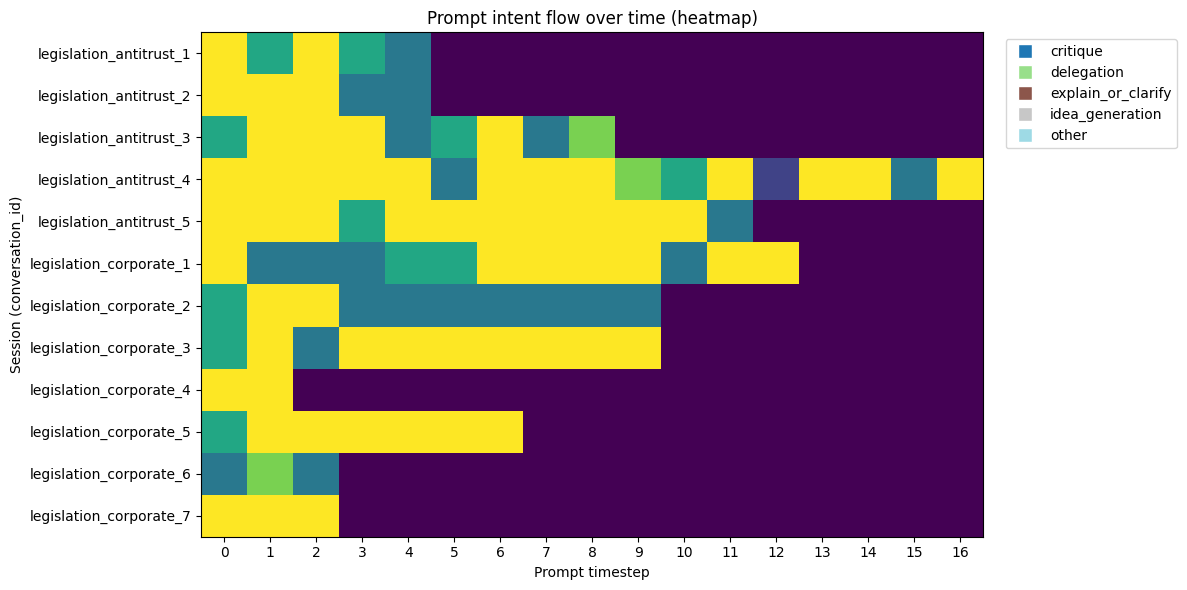

In [4]:
plt.figure(figsize=(12, 6))
plt.imshow(H.fillna(-1), aspect="auto")  # -1 = missing timesteps
plt.yticks(range(len(H.index)), H.index)
plt.xticks(range(int(H.columns.max())+1))
plt.xlabel("Prompt timestep")
plt.ylabel("Session (conversation_id)")
plt.title("Prompt intent flow over time (heatmap)")

# legend
handles = [plt.Line2D([0],[0], marker='s', color='w', label=lab,
                      markerfacecolor=plt.cm.tab20(intent_to_id[lab]/max(1,len(intents)-1)), markersize=10)
           for lab in intents]
plt.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


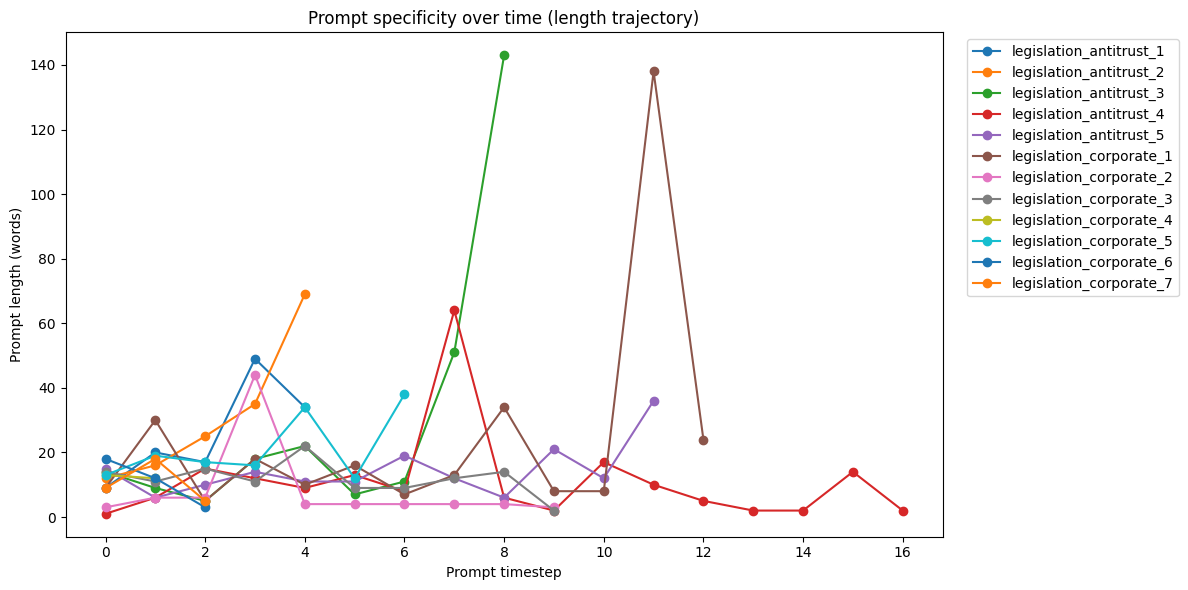

In [5]:
plt.figure(figsize=(12, 6))

for convo_id, g in traj.groupby("conversation_id"):
    g = g.sort_values("timestep")
    plt.plot(g["timestep"], g["prompt_length"], marker="o", label=convo_id)

plt.xlabel("Prompt timestep")
plt.ylabel("Prompt length (words)")
plt.title("Prompt specificity over time (length trajectory)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


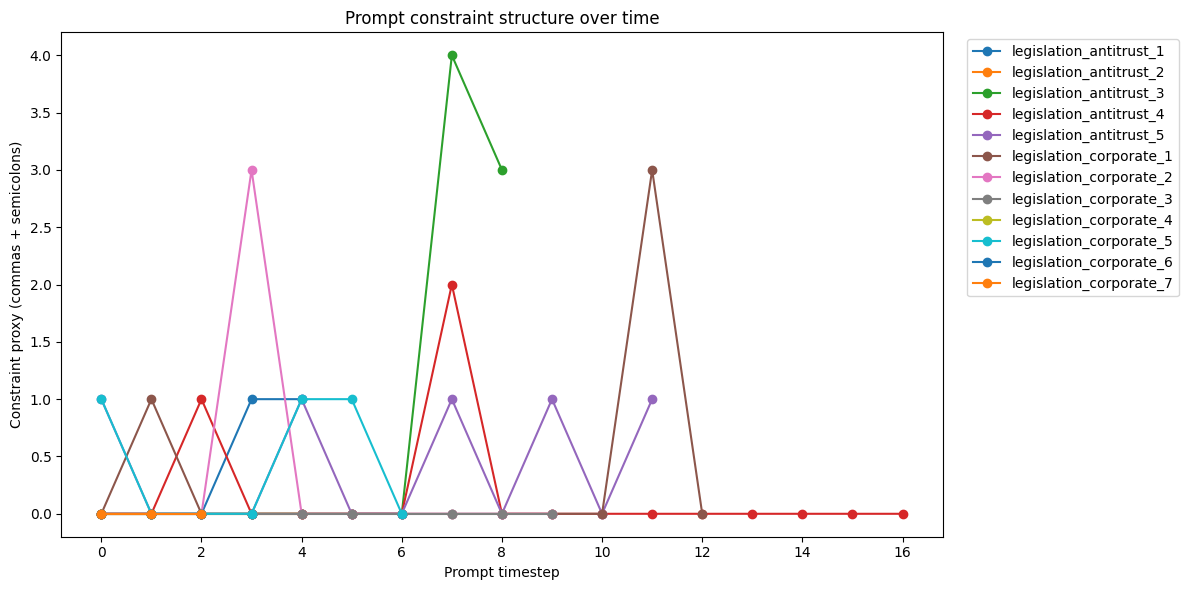

In [6]:
plt.figure(figsize=(12, 6))

for convo_id, g in traj.groupby("conversation_id"):
    g = g.sort_values("timestep")
    plt.plot(g["timestep"], g["num_constraints"], marker="o", label=convo_id)

plt.xlabel("Prompt timestep")
plt.ylabel("Constraint proxy (commas + semicolons)")
plt.title("Prompt constraint structure over time")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


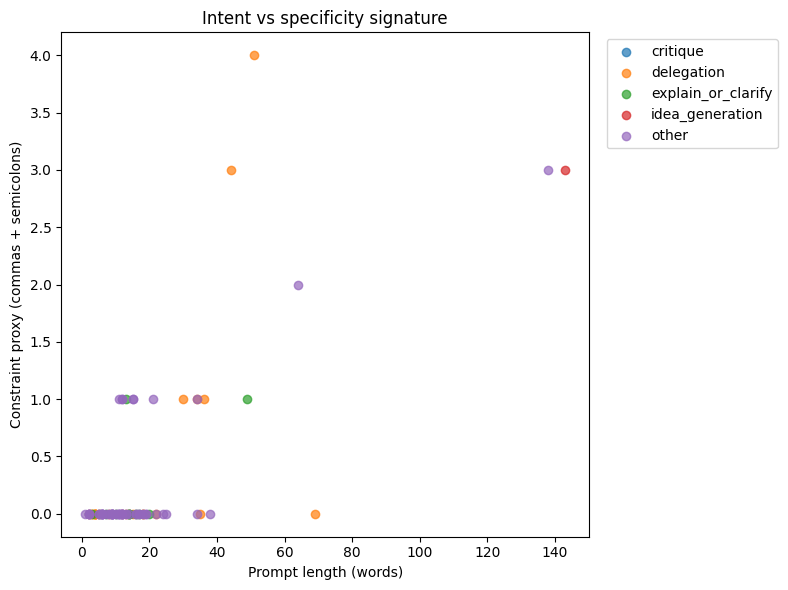

In [7]:
plt.figure(figsize=(8, 6))

for intent, g in traj.groupby("prompt_intent"):
    plt.scatter(g["prompt_length"], g["num_constraints"], label=intent, alpha=0.7)

plt.xlabel("Prompt length (words)")
plt.ylabel("Constraint proxy (commas + semicolons)")
plt.title("Intent vs specificity signature")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_30560\1331683959.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


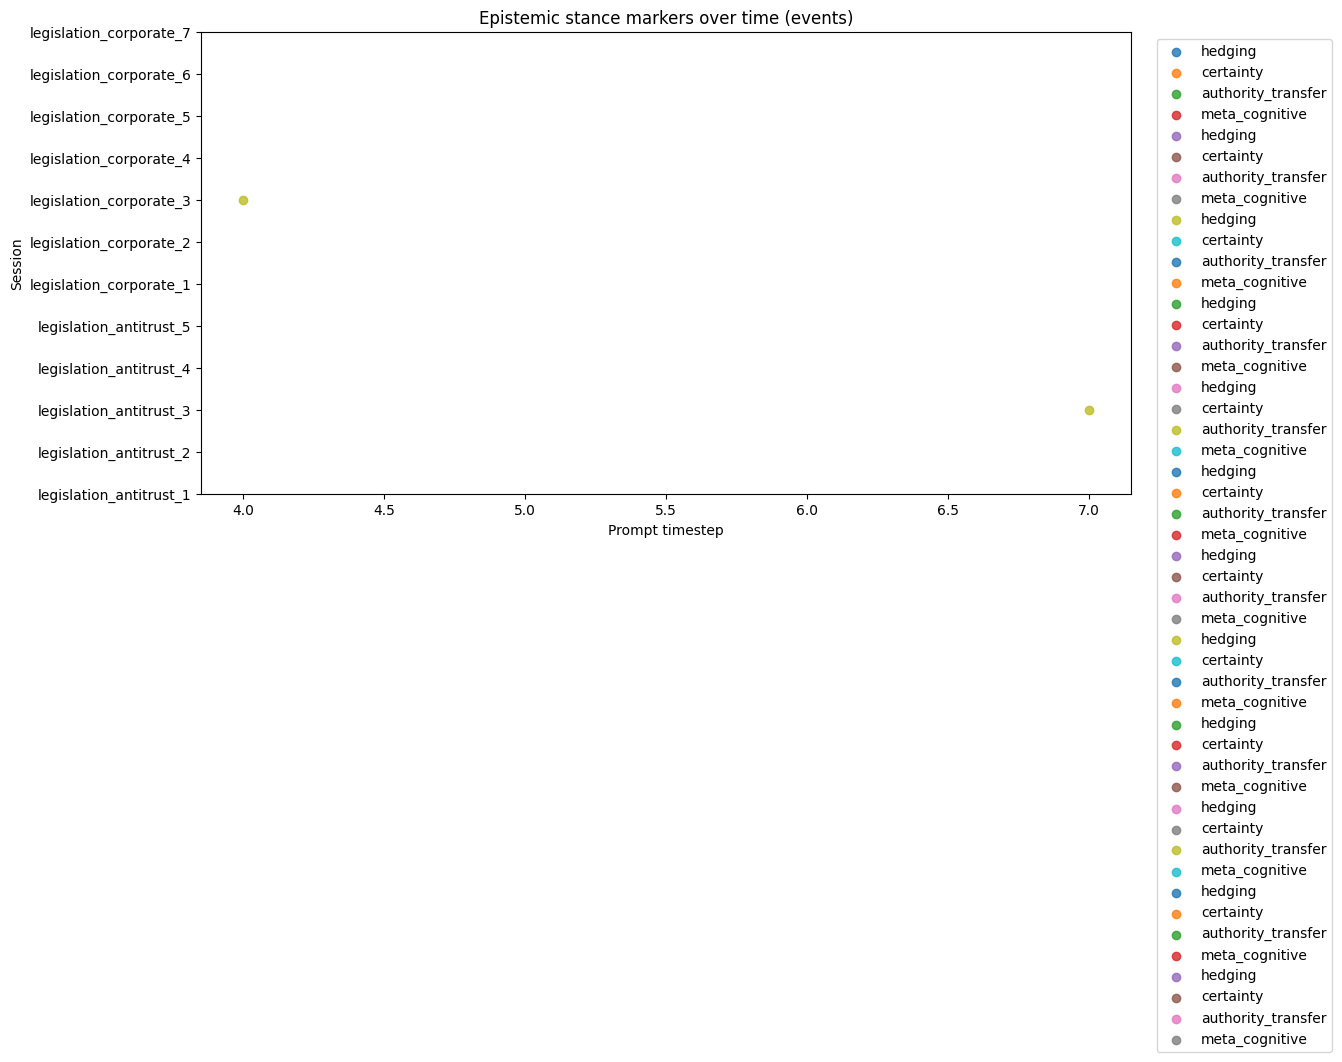

In [8]:
markers = ["hedging", "certainty", "authority_transfer", "meta_cognitive"]

fig, ax = plt.subplots(figsize=(12, 6))

y_map = {cid:i for i,cid in enumerate(sorted(traj["conversation_id"].unique()))}

for cid, g in traj.groupby("conversation_id"):
    y = y_map[cid]
    g = g.sort_values("timestep")
    for m in markers:
        hits = g[g[m] == True]
        ax.scatter(hits["timestep"], [y]*len(hits), label=m, alpha=0.8)

ax.set_yticks(list(y_map.values()))
ax.set_yticklabels(list(y_map.keys()))
ax.set_xlabel("Prompt timestep")
ax.set_ylabel("Session")
ax.set_title("Epistemic stance markers over time (events)")
ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [9]:
summ.sort_values(["meta_cog_rate", "avg_prompt_length"], ascending=False)

,conversation_id,num_prompts,meta_cog_rate,hedging_rate,certainty_rate,avg_prompt_length,avg_constraints
1,legislation_antitrust_2,5,0.0,0.000000,0.0,31.400000,0.000000
2,legislation_antitrust_3,9,0.0,0.111111,0.0,31.111111,0.777778
0,legislation_antitrust_1,5,0.0,0.000000,0.0,25.800000,0.400000
5,legislation_corporate_1,13,0.0,0.000000,0.0,24.615385,0.307692
9,legislation_corporate_5,7,0.0,0.000000,0.0,21.285714,0.428571
4,legislation_antitrust_5,12,0.0,0.000000,0.0,14.416667,0.416667
8,legislation_corporate_4,2,0.0,0.000000,0.0,12.500000,0.000000
7,legislation_corporate_3,10,0.0,0.100000,0.0,11.900000,0.000000
3,legislation_antitrust_4,17,0.0,0.000000,0.0,11.058824,0.176471
10,legislation_corporate_6,3,0.0,0.000000,0.0,11.000000,0.000000


In [ ]:

df = pd.read_csv("prompt_trajectories.csv")

# Look at prompts currently classified as "other"
others = df[df["prompt_intent"] == "other"]

# Show a random sample
others.sample(10, random_state=42)[
    ["conversation_id", "timestep", "prompt_length"]
]
